# Stratified_GridSearchCV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór Wine

In [2]:
np.random.seed(1)
wine = datasets.load_wine()
# print description
# print(wine.DESCR)

In [3]:
# get the data
X = wine.data
y = wine.target

Podzielmy zbiór na część testową i treningową .

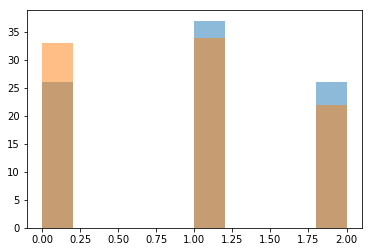

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy dla 

* SVM z jądrem rbf
* SVM z jądrem poly
* SVM liniowego
* Regresji logistycznej


In [30]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
              'gamma': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_1 = GridSearchCV(SVC(), param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'C': 100000, 'gamma': 1e-06}

In [69]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [70]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_1.cv_results_)
# show the first 5 rows
# display(results.head())

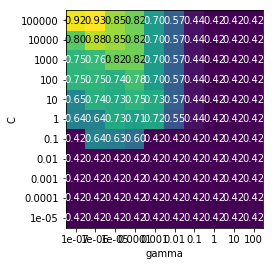

In [72]:
scores = np.array(results.mean_test_score).reshape(11, 10)
# plot the mean cross-validation scores
heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

In [73]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_2 = GridSearchCV(SVC(kernel="linear"), param_grid, cv=kfold)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'C': 1}

In [107]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 200, 300, 400],
              'degree': [2, 3, 4],
              'coef0': [0, 1] 
             }

grid_3 = GridSearchCV(SVC(kernel="poly"), param_grid, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'C': 0.001, 'coef0': 0, 'degree': 3}

In [114]:
# import pandas as pd
# # convert to DataFrame
# results = pd.DataFrame(grid_3.cv_results_)
# # show the first 5 rows
# # display(results.head())

# scores_all = np.array(results.mean_test_score).reshape(9, 3, 2)

# scores= scores_all[:,:,0].reshape(9,3)
# # plot the mean cross-validation scores
# heatmap(scores, xlabel='degree', xticklabels=param_grid['degree'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
# plt.show()


In [105]:
scores_all.shape

(9, 3, 2)

In [101]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 200, 300, 400],
             'penalty': ['l1', 'l2']}

grid_4 = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'C': 300, 'penalty': 'l1'}

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html

In [76]:
from sklearn import  metrics


models = []
models.append(('SVM rbf', grid_1.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('SVM poly', grid_3.best_estimator_))
models.append(('Logistic Regression', grid_4.best_estimator_))


precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test), average='weighted') ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test), average='weighted') ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test), average='weighted') ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test), average='weighted'))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test), average='weighted'))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test), average='weighted'))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

SVM rbf
precision_score: 0.9105687218707708
recall_score: 0.9101123595505618
f1_score: 0.9101396596843325
accuracy_score: 0.9101123595505618
SVM linear
precision_score: 0.9337479935794543
recall_score: 0.9325842696629213
f1_score: 0.9325542270023434
accuracy_score: 0.9325842696629213
SVM poly
precision_score: 0.9044485988439748
recall_score: 0.898876404494382
f1_score: 0.8987607001849762
accuracy_score: 0.898876404494382
Logistic Regression
precision_score: 0.9690252049802611
recall_score: 0.9662921348314607
f1_score: 0.9662017046096806
accuracy_score: 0.9662921348314607


In [77]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM rbf', 'SVM linear', 'SVM poly', 'LogisticRegression'])
df

,Method,accuracy_score,f1_score,precision_score,recall_score
0,SVM rbf,0.910112,0.910140,0.910569,0.910112
1,SVM linear,0.932584,0.932554,0.933748,0.932584
2,SVM poly,0.898876,0.898761,0.904449,0.898876
3,LogisticRegression,0.966292,0.966202,0.969025,0.966292
